In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

2.6.0


In [2]:
# https://www.youtube.com/watch?v=A9JqeLvAI3g&list=PLS8gIc2q83OhM0RTktKDitgZGX5dHo7Vs&index=8

In [3]:
X_data = np.array([[1,2,0],[5,4,3],[1,2,-1],[3,1,0],[2,4,2],[4,1,2],[-1,3,2],[4,3,3],[0,2,6],[2,2,1],[1,-2,-2],[0,1,3],[1,1,3],[0,1,3],[2,3,3]])

t_data = np.array([-4,4,-6,3,-4,9,-7,5,6,0,4,3,5,5,1])

print('X_data.shape = ', X_data.shape, ',t_data.shape=', t_data.shape)

X_data.shape =  (15, 3) ,t_data.shape= (15,)


In [4]:
model = Sequential()

model.add(Dense(1, input_shape=(3, ), activation='linear'))
# 정답을 만들어내는 입력데이터는 3개이므로 input_shape은 3, 로 나타냄
# 활성화함수는 구축하는 시스템이 linear regression 시스템이므로 활성화함수 activation은 linear


In [5]:
model.compile(optimizer = SGD(learning_rate=1e-2), loss='mse')
#             학습알고리즘 SGD   학습률             손실함수(선형회귀문제이기 때문에 평균제곱오차를 나타내는 mse로 초기화)
#모델구축과 컴파일과정이 끝나면 실제 학습을 진행하기 전에 일반적으로 summary를 통해 전체적인 모델의 구조와 shape, 학습할 파라미터를 확인할 수 있음
# 학습할 파라미터 총 4개(각각의 입력에 대응되는 가중치 3개와 여기에서 출력되는 출력층에서의 bias1개 총 4개의 parameter를 학습해야 한다.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [6]:
hist = model.fit(X_data, t_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 146ms/step - loss: 20.1090
Epoch 2/1000
1/1 [==============================] - 0s 946us/step - loss: 17.8523
Epoch 3/1000
1/1 [==============================] - 0s 1000us/step - loss: 16.3303
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 15.1991
Epoch 5/1000
1/1 [==============================] - 0s 999us/step - loss: 14.2850
Epoch 6/1000
1/1 [==============================] - 0s 1000us/step - loss: 13.4994
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 12.7967
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 12.1526
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 11.5539
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 10.9929
Epoch 11/1000
1/1 [==============================] - 0s 1ms/step - loss: 10.4647
Epoch 12/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.9661
Epoch 13/1000
1/1 [=======

In [7]:
test_data = [[5,5,0],[2,3,1],[-1,0,-1],[10,5,2],[4,-1,-2]]

ret_val = [2*data[0]-3*data[1]+2*data[2] for data in test_data]
prediction_val = model.predict(np.array(test_data))

print(prediction_val) # 예측값
print("==="*20) 
print(ret_val) # 정답

[[-5.410649 ]
 [-3.0237107]
 [-3.7547278]
 [ 8.417273 ]
 [ 6.955239 ]]
[-5, -3, -4, 9, 7]


In [8]:
print(model.input) #모델 입력
print(model.output) #모델 출력
print(model.weights) #모델 가중치

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")
[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.9402379],
       [-3.0721428],
       [ 2.063366 ]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.24887617], dtype=float32)>]


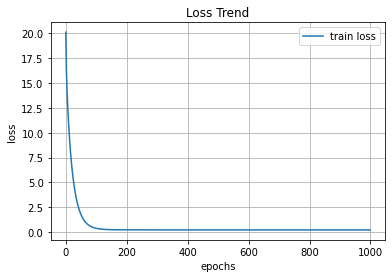

In [9]:
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.legend(loc='best')

plt.show()